# Potential Mechanic Centre Recommendation



**Contents**

1. [Recommendation](#recommendation)
2. [Exploratory Data Analysis](#eda)
3. [Correlation Analysis](#correlation-analysis)
4. [Outlier Analysis](#outlier-analysis)
5. [Feature Selection](#feature-selection)
6. [Regression Analysis](#regression-analysis)

### Recommendation

#### Recommended Centres Top 5: 


#### Reasoning:




Note

> While annual revenue is the main factor, also account for other aspects like operational feasibility, competition, or alignment with company strategy.

> For instance, a location with slightly lower revenue but minimal competition might still be a strong candidate.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [3]:
# reading the data
current_centers = pd.read_excel("data/data.xlsx", sheet_name="Current Centres")
potential_centers = pd.read_excel("data/data.xlsx", sheet_name="Potential Centres")

current_centers.shape, potential_centers.shape

((1006, 13), (100, 12))

In [6]:
current_centers.isna().sum()

CENTRE_NO                         0
TYRE_BAYS                         0
MOT_BAYS                          0
SERVICE_BAYS                      0
TOTAL_STAFF                       0
AVG_DAILY_STAFF                   0
AVG_SALARY                        0
HOURS_OPEN_PER_WEEK               0
AREA_EV_PERC                     12
AREA_POPULATION_DENSITY_PPSKM    12
ANNUAL_RENT                       0
AREA_AFFLUENCE_GRADE              0
ANNUAL_REVENUE                    0
dtype: int64

In [7]:
potential_centers.isna().sum()

CENTRE_NO                        0
TYRE_BAYS                        0
MOT_BAYS                         0
SERVICE_BAYS                     0
TOTAL_STAFF                      0
AVG_DAILY_STAFF                  0
AVG_SALARY                       0
HOURS_OPEN_PER_WEEK              0
AREA_EV_PERC                     1
AREA_POPULATION_DENSITY_PPSKM    1
ANNUAL_RENT                      0
AREA_AFFLUENCE_GRADE             0
dtype: int64

> It is observed that approximately 0.01% of the current centres and 0.01% of the potential centres is missing. It is possible to impute the missing data using various imputation method. Due to unavailable access to Subject Matter Expert and domain knowledge, its better to drop the missing rows as oppose to add `assumption bias`

In [8]:
current_centers = current_centers.dropna()
potential_centers = potential_centers.dropna()
current_centers.shape, potential_centers.shape

((994, 13), (99, 12))

> Now, to understand the categorical and numerical variables, and check proper data types of the columns

In [10]:
current_centers.dtypes

CENTRE_NO                          int64
TYRE_BAYS                          int64
MOT_BAYS                           int64
SERVICE_BAYS                       int64
TOTAL_STAFF                        int64
AVG_DAILY_STAFF                  float64
AVG_SALARY                         int64
HOURS_OPEN_PER_WEEK              float64
AREA_EV_PERC                     float64
AREA_POPULATION_DENSITY_PPSKM    float64
ANNUAL_RENT                        int64
AREA_AFFLUENCE_GRADE              object
ANNUAL_REVENUE                   float64
dtype: object

> Looks Good!

> `ANNUAL_REVENUE` is considered as dependent variable and rest is independent. 

In [23]:
current_centers["AREA_AFFLUENCE_GRADE"].value_counts()

AREA_AFFLUENCE_GRADE
C    359
D    318
E    144
B    129
F     27
A     17
Name: count, dtype: int64

> This is the asumption that area affluence grade is similar to council tax band where A being the low and F being high. Data encoding is performed inorder to the convert categorical to numeric values.


In [24]:
encoding_map = {
    "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6
}
current_centers["AREA_AFFLUENCE_GRADE"] = current_centers["AREA_AFFLUENCE_GRADE"].map(encoding_map)
potential_centers["AREA_AFFLUENCE_GRADE"] = potential_centers["AREA_AFFLUENCE_GRADE"].map(encoding_map)
current_centers["AREA_AFFLUENCE_GRADE"].value_counts()

AREA_AFFLUENCE_GRADE
3    359
4    318
5    144
2    129
6     27
1     17
Name: count, dtype: int64

### Correlation Analysis

> Note: 
> Corr Analysis is performed with the nuance in mind that correlation != causation
> `ANNUAL_REVENUE` is not included in the correlation as the correlation analysis is performed on the independent variables

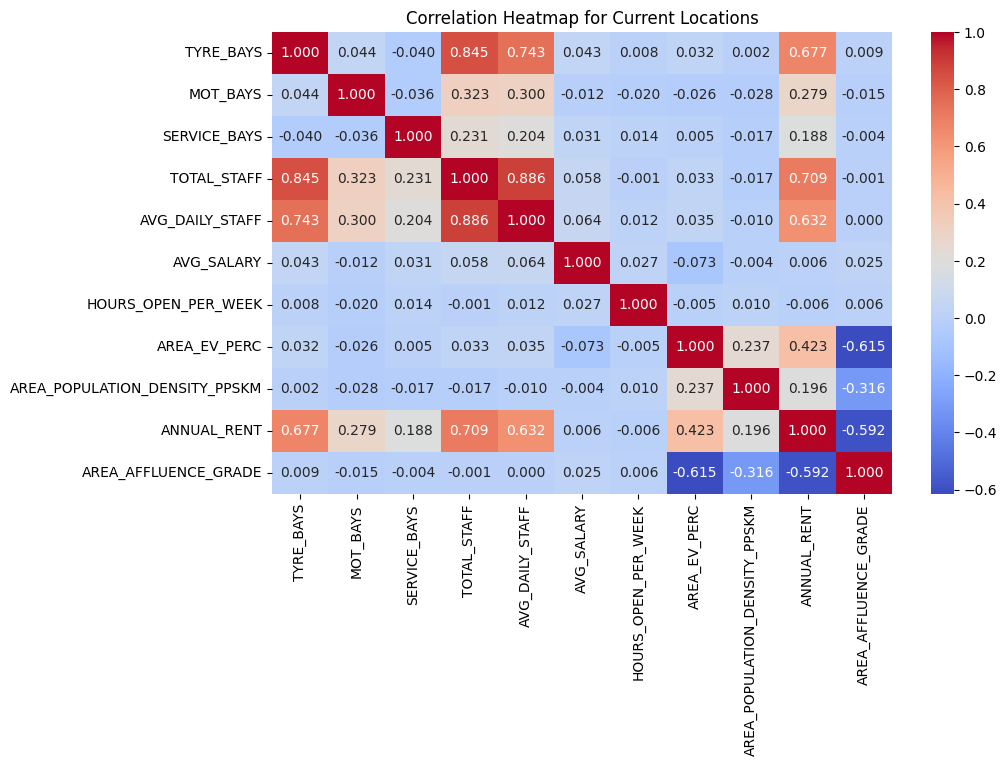

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(current_centers.drop(columns=["ANNUAL_REVENUE", "CENTRE_NO"]).corr(numeric_only=True), annot=True, fmt=".3f", cmap='coolwarm')
plt.title("Correlation Heatmap for Current Locations")
plt.show()

It is observed that there are strong correlation, between the following

- Total staff - Tyre bays
- avg daily staff - tyre bays
- annual rent - tyre bays
- avg daily staff - total staff
- annual rent - avg daily staff
- Area affluence grade - area population

### Outlier Analysis

In [47]:
current_centers.columns

Index(['CENTRE_NO', 'TYRE_BAYS', 'MOT_BAYS', 'SERVICE_BAYS', 'TOTAL_STAFF',
       'AVG_DAILY_STAFF', 'AVG_SALARY', 'HOURS_OPEN_PER_WEEK', 'AREA_EV_PERC',
       'AREA_POPULATION_DENSITY_PPSKM', 'ANNUAL_RENT', 'AREA_AFFLUENCE_GRADE',
       'ANNUAL_REVENUE'],
      dtype='object')

In [52]:
numerical_columns = [
    'TYRE_BAYS', 'MOT_BAYS', 'SERVICE_BAYS', 'TOTAL_STAFF',
       'AVG_DAILY_STAFF', 'AVG_SALARY', 'HOURS_OPEN_PER_WEEK', 'AREA_EV_PERC',
       'AREA_POPULATION_DENSITY_PPSKM', 'ANNUAL_RENT', 'AREA_AFFLUENCE_GRADE', "ANNUAL_REVENUE"
]

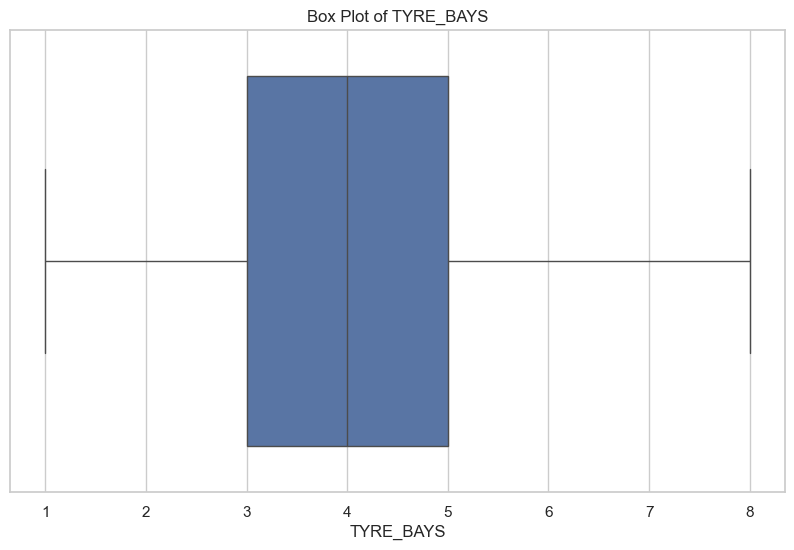

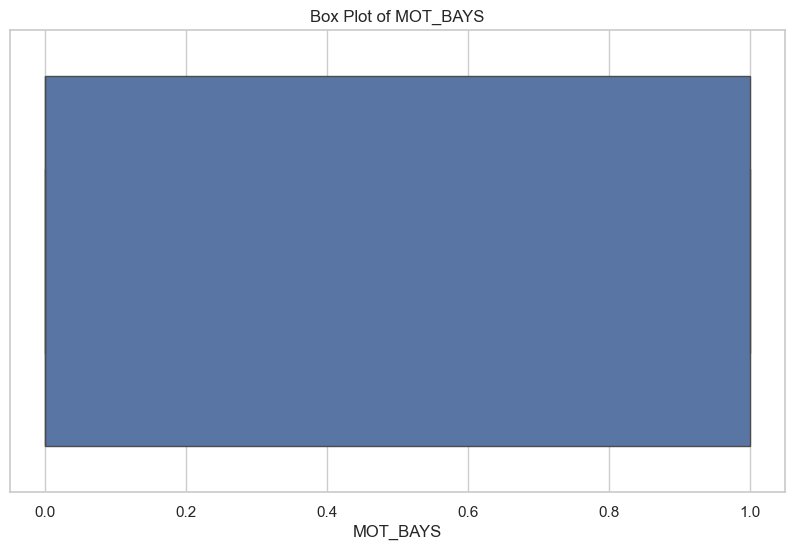

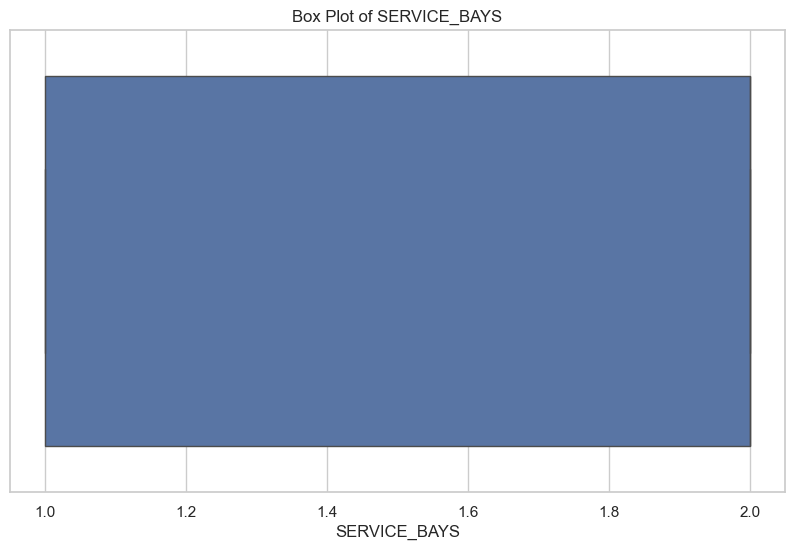

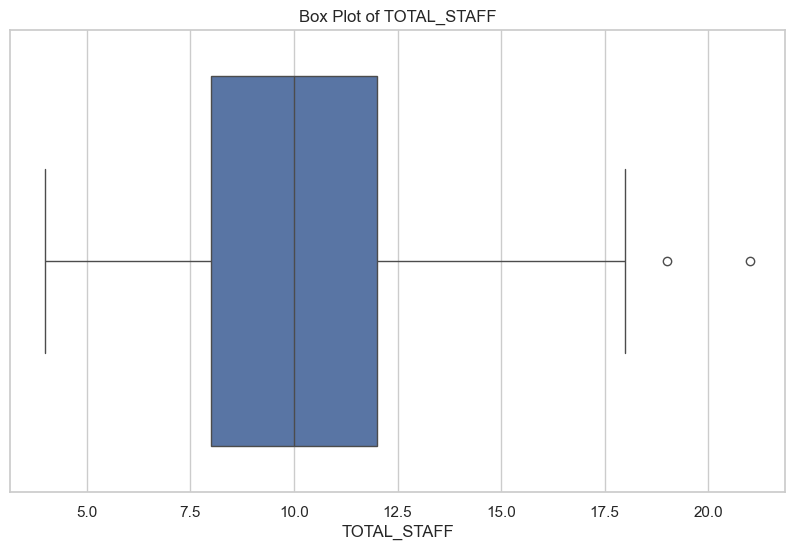

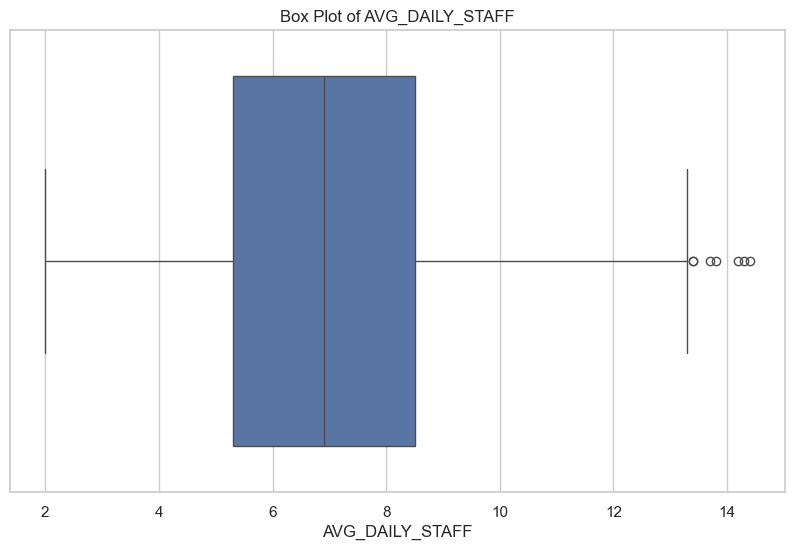

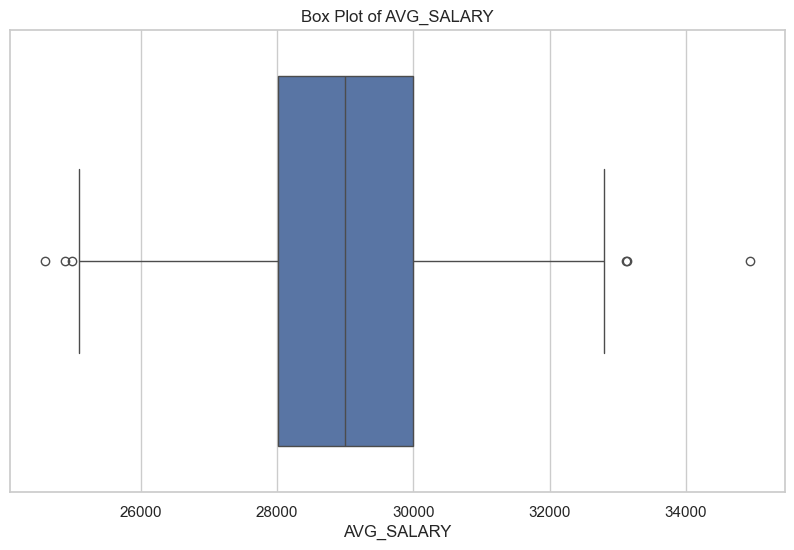

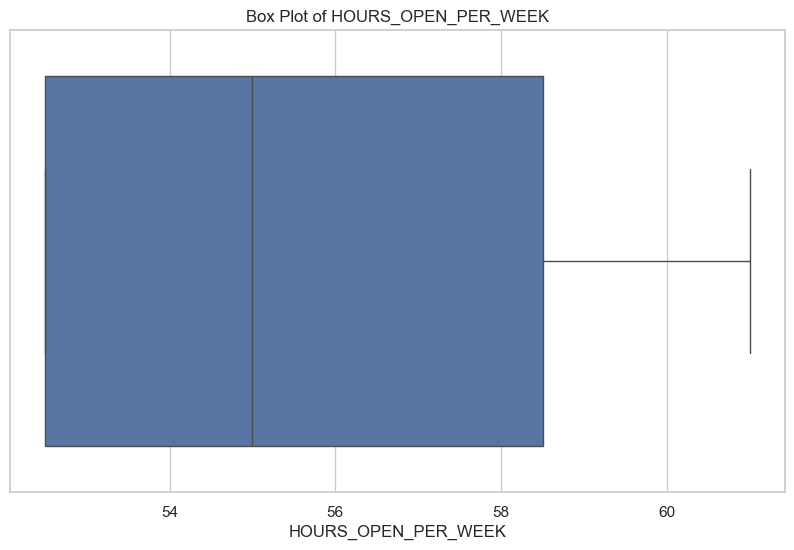

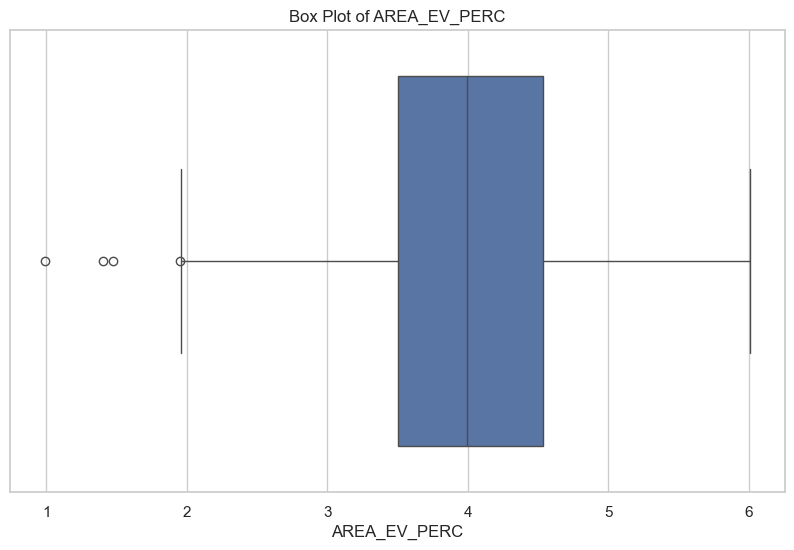

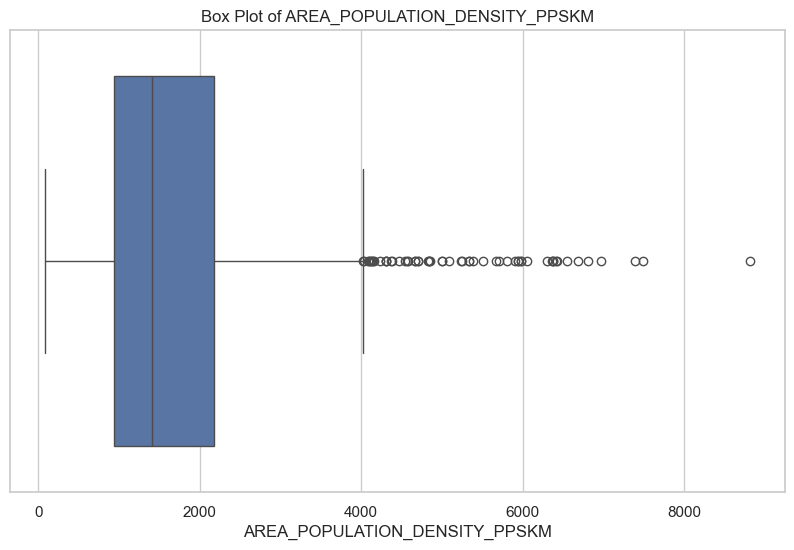

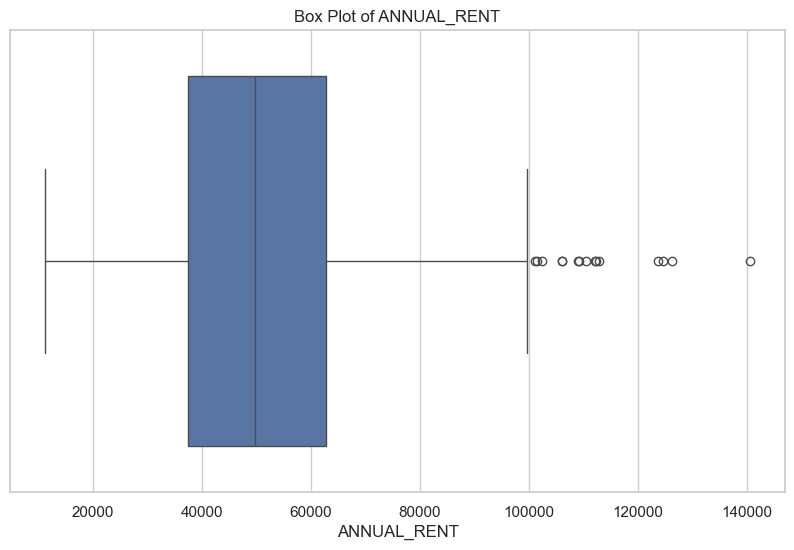

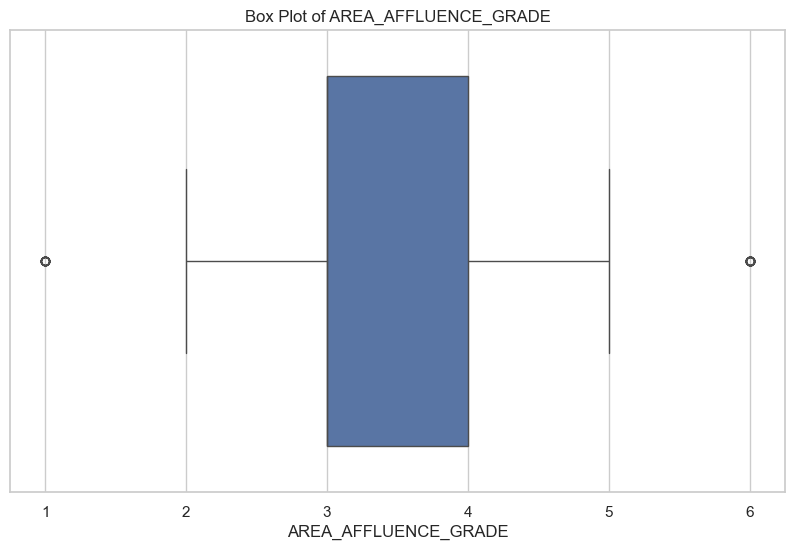

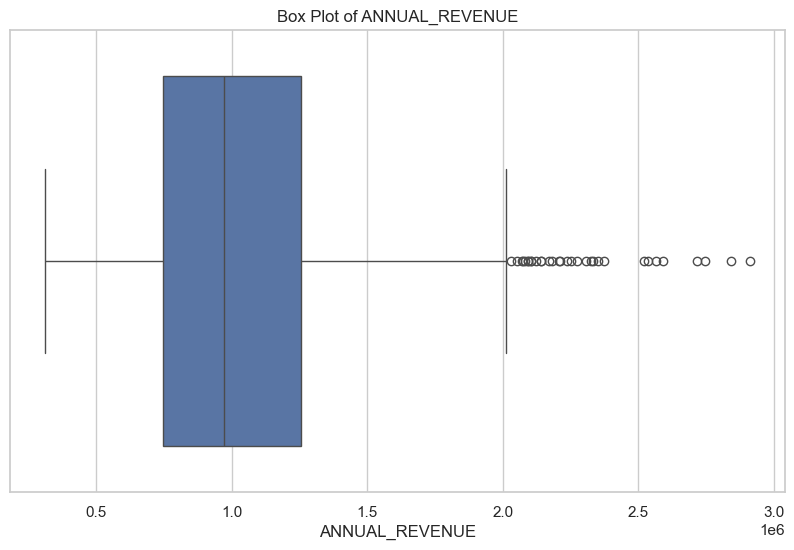

In [54]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=current_centers[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

### Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [62]:
model = RandomForestRegressor(n_estimators=50)
selector = RFECV(model, step=100, cv=5)
selector = selector.fit(current_centers.drop(columns=["ANNUAL_REVENUE", "CENTRE_NO"]), current_centers["ANNUAL_REVENUE"])
current_centers.drop(columns=["ANNUAL_REVENUE", "CENTRE_NO"]).columns[selector.support_]

Index(['TYRE_BAYS', 'MOT_BAYS', 'SERVICE_BAYS', 'TOTAL_STAFF',
       'AVG_DAILY_STAFF', 'AVG_SALARY', 'HOURS_OPEN_PER_WEEK', 'AREA_EV_PERC',
       'AREA_POPULATION_DENSITY_PPSKM', 'ANNUAL_RENT', 'AREA_AFFLUENCE_GRADE'],
      dtype='object')

In [63]:
current_centers.columns

Index(['CENTRE_NO', 'TYRE_BAYS', 'MOT_BAYS', 'SERVICE_BAYS', 'TOTAL_STAFF',
       'AVG_DAILY_STAFF', 'AVG_SALARY', 'HOURS_OPEN_PER_WEEK', 'AREA_EV_PERC',
       'AREA_POPULATION_DENSITY_PPSKM', 'ANNUAL_RENT', 'AREA_AFFLUENCE_GRADE',
       'ANNUAL_REVENUE'],
      dtype='object')

#### Regression Analysis

In [ ]:
# perform linear regression on the current centers with Annual Revenues as the target variable
# split the data in 80-20 ratio
# train the model on 80% of the data
# test the model on 20% of the data

# use the model to predict the annual revenue for the potential centers
# pick the top 5 potential centers with the highest predicted annual revenue
# analysis the regression coefficients and intercept
# form the reasoning based on the correlation analysis + regression coefficients

In [17]:
np.random.seed(42)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [1]:
current_centers.head()

NameError: name 'current_centers' is not defined

In [66]:
x_train, x_test, y_train, y_test = train_test_split(
    current_centers.drop(columns=["ANNUAL_REVENUE", "CENTRE_NO"]), current_centers["ANNUAL_REVENUE"], test_size=0.2, shuffle=True, random_state=42)

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((795, 11), (199, 11), (795,), (199,))

In [68]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
coefficients = model.coef_
intercept = model.intercept_
coef_df = pd.DataFrame(coefficients, index=x_train.columns, columns=["Coefficient"])
coef_df.loc["intercept"] = intercept
coef_df

,Coefficient
TYRE_BAYS,1.186261e+05
MOT_BAYS,2.478792e+05
SERVICE_BAYS,3.544576e+05
TOTAL_STAFF,1.948781e+04
AVG_DAILY_STAFF,-6.750776e+03
AVG_SALARY,-5.866132e+00
HOURS_OPEN_PER_WEEK,3.782338e+04
AREA_EV_PERC,9.370197e+03
AREA_POPULATION_DENSITY_PPSKM,4.605288e+01
ANNUAL_RENT,7.007306e-01


In [71]:
y_pred = model.predict(x_test)
mse = mean_absolute_error(y_test, y_pred)
mse # this is a problem ! the model is not performing well, ideally this should be as low as possible

159625.57686732884

In [72]:
r2_score(y_test, y_pred) # this is also a problem ! the model is not performing well, ideally this should be as close to 1 as possible

0.7392011077816298

In [73]:
potential_centers.columns

Index(['CENTRE_NO', 'TYRE_BAYS', 'MOT_BAYS', 'SERVICE_BAYS', 'TOTAL_STAFF',
       'AVG_DAILY_STAFF', 'AVG_SALARY', 'HOURS_OPEN_PER_WEEK', 'AREA_EV_PERC',
       'AREA_POPULATION_DENSITY_PPSKM', 'ANNUAL_RENT', 'AREA_AFFLUENCE_GRADE',
       'PREDICTED_ANNUAL_REVENUE'],
      dtype='object')

In [74]:
potential_centers.drop(columns=["PREDICTED_ANNUAL_REVENUE"], inplace=True)

In [75]:
potential_centers["PREDICTED_ANNUAL_REVENUE"] = model.predict(potential_centers.drop(columns=["CENTRE_NO"]))
potential_centers = potential_centers.sort_values(by="PREDICTED_ANNUAL_REVENUE", ascending=False)
potential_centers.nlargest(5, "PREDICTED_ANNUAL_REVENUE")

,CENTRE_NO,TYRE_BAYS,MOT_BAYS,SERVICE_BAYS,TOTAL_STAFF,AVG_DAILY_STAFF,AVG_SALARY,HOURS_OPEN_PER_WEEK,AREA_EV_PERC,AREA_POPULATION_DENSITY_PPSKM,ANNUAL_RENT,AREA_AFFLUENCE_GRADE,PREDICTED_ANNUAL_REVENUE
67,91,8,1,2,18,10.1,29505,55.0,4.698264,1029.507564,101000,3,1.872115e+06
99,79,6,1,2,13,8.6,29294,58.5,4.461708,2839.099762,80700,3,1.748065e+06
5,63,5,1,2,12,8.3,26228,55.0,5.431028,6345.249702,96400,2,1.689758e+06
79,73,6,1,2,14,12.2,26487,58.5,3.911999,802.490827,66400,4,1.640127e+06
1,74,5,1,2,15,9.6,26565,58.5,4.628830,2092.164975,69700,3,1.637132e+06


In [76]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
rf_model.feature_importances_

array([0.03390293, 0.04452086, 0.11418733, 0.37498146, 0.05244869,
       0.04489516, 0.09629229, 0.03253175, 0.06121635, 0.13702502,
       0.00799816])

In [79]:
y_pred = rf_model.predict(x_test)
mse = mean_absolute_error(y_test, y_pred)
mse # this is a problem ! the model is not performing well, ideally this should be as low as possible

168517.0485625694